In [1]:
# Put your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from zipfile import ZipFile

In [2]:
data_folder = './data/'
zip_file = ZipFile(data_folder+'ira_tweets_new.zip')
data1 = pd.read_csv(zip_file.open('rus_troll_tweet_text.csv'))
data2 = pd.read_csv(zip_file.open('rus_troll_tweet_stats.csv'))
data3 = pd.read_csv(zip_file.open('rus_troll_tweet_metadata.csv'))
data4 = pd.read_csv(zip_file.open('rus_troll_user.csv'))

C:\Program Files\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(data1.shape,data2.shape,data3.shape,data4.shape)

(9041308, 3) (9041308, 17) (9041308, 6) (3667, 11)


In [4]:
data2.dtypes

tweetid                   int64
userid                   object
tweet_time               object
in_reply_to_tweetid     float64
in_reply_to_userid       object
quoted_tweet_tweetid    float64
is_retweet                 bool
retweet_userid           object
retweet_tweetid         float64
quote_count               int64
reply_count               int64
like_count                int64
retweet_count             int64
hashtags                 object
urls                     object
user_mentions            object
poll_choices             object
dtype: object

In [5]:
data = pd.concat([data1, data2, data3], axis=1, sort=False)

In [6]:
italian_tweets = data[data.tweet_language == 'it']

In [7]:
italian_tweets = pd.merge(italian_tweets, data4, on ='userid')

In [8]:
italian_tweets.shape

(20376, 36)

In [9]:
italian_tweets.to_csv("italian_tweets.csv")

In [30]:
italian_tweets.head(20)

,tweetid,tweet_language,tweet_text,tweetid,userid,tweet_time,in_reply_to_tweetid,in_reply_to_userid,quoted_tweet_tweetid,is_retweet,...,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,account_creation_date,account_language,follower_count_y,following_count_y,last_tweet_at
0,841607500931584000,it,RT @MuseoOmero: #14marzo #paesaggioitaliano Mo...,841607500931584000,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,2017-03-14 11:10,NaN,NaN,NaN,True,...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,Italy,❤️❤️❤️,NaN,2017-03-06,en,99,545,2017-06-28 09:35
1,842354395077533696,it,RT @Radio3tweet: La ministra @valeriafedeli in...,842354395077533696,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,2017-03-16 12:38,NaN,NaN,NaN,True,...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,Italy,❤️❤️❤️,NaN,2017-03-06,en,99,545,2017-06-28 09:35
2,844596831786979330,it,RT @Radio1Rai: NEWS/ Attacco #Londra: May riun...,844596831786979330,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,2017-03-22 17:09,NaN,NaN,NaN,True,...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,Italy,❤️❤️❤️,NaN,2017-03-06,en,99,545,2017-06-28 09:35
3,845024247672057856,it,RT @PiazzapulitaLA7: Assolutamente non ci alle...,845024247672057856,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,2017-03-23 21:27,NaN,NaN,NaN,True,...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,Italy,❤️❤️❤️,NaN,2017-03-06,en,99,545,2017-06-28 09:35
4,851197631724347392,it,RT @ilmessaggeroit: Dopo Ivrea/ Le risposte ma...,851197631724347392,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,2017-04-09 22:18,NaN,NaN,NaN,True,...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,Italy,❤️❤️❤️,NaN,2017-03-06,en,99,545,2017-06-28 09:35
5,845045676819988480,it,"RT @Gazzetta_it: Sousa-Fiorentina, divorzio vi...",845045676819988480,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,2017-03-23 22:52,NaN,NaN,NaN,True,...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,Italy,❤️❤️❤️,NaN,2017-03-06,en,99,545,2017-06-28 09:35
6,843872921927868417,it,RT @repubblicait: Ragazzina di 15 anni violent...,843872921927868417,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,2017-03-20 17:12,NaN,NaN,NaN,True,...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,Italy,❤️❤️❤️,NaN,2017-03-06,en,99,545,2017-06-28 09:35
7,839339306426613760,it,"RT @repubblicait: Corea del Sud, spunta il fig...",839339306426613760,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,2017-03-08 04:57,NaN,NaN,NaN,True,...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,Italy,❤️❤️❤️,NaN,2017-03-06,en,99,545,2017-06-28 09:35
8,858544393405423616,it,RT @RaiRadio2: Colore: rosa Odore: di quello c...,858544393405423616,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,2017-04-30 04:51,NaN,NaN,NaN,True,...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,Italy,❤️❤️❤️,NaN,2017-03-06,en,99,545,2017-06-28 09:35
9,847222130227822592,it,"RT @repubblica: Tennis, Fognini riscrive la st...",847222130227822592,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,2017-03-29 23:01,NaN,NaN,NaN,True,...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,378410ae3ae135e4f2271e4cad9190bae2d5b029c58881...,Italy,❤️❤️❤️,NaN,2017-03-06,en,99,545,2017-06-28 09:35


In [4]:
data.dtypes

tweetid            int64
tweet_language    object
tweet_text        object
dtype: object

In [5]:
data.isnull().any()

tweetid           False
tweet_language     True
tweet_text         True
dtype: bool

In [10]:
#us_tweets=data[(data.language=='English') & (data.region=='United States')]
italian_tweets = data[data.tweet_language == 'it']

In [11]:
italian_tweets

,tweetid,tweet_language,tweet_text
258,841607500931584000,it,RT @MuseoOmero: #14marzo #paesaggioitaliano Mo...
1102,842354395077533696,it,RT @Radio3tweet: La ministra @valeriafedeli in...
1275,837620391489187840,it,Magnesia-O. @hardwick @midnight #SuperOldHeroes
2958,844596831786979330,it,RT @Radio1Rai: NEWS/ Attacco #Londra: May riun...
2959,845024247672057856,it,RT @PiazzapulitaLA7: Assolutamente non ci alle...
2960,851197631724347392,it,RT @ilmessaggeroit: Dopo Ivrea/ Le risposte ma...
3027,504873277974908928,it,"L'America, L'America, L'America"
3197,584011353372790785,it,UnCorked at Ghiradelli Square #news
5409,845045676819988480,it,"RT @Gazzetta_it: Sousa-Fiorentina, divorzio vi..."
5410,843872921927868417,it,RT @repubblicait: Ragazzina di 15 anni violent...


In [8]:
# Think about it
data[data.region.isnull()]

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
384,2.528777e+09,1488REASONS,Причина #37 Во Владивостоке перед новым годом ...,NaN,Russian,12/11/2016 11:24,12/24/2016 11:15,6339,6328,1785,NaN,Russian,0,0,NonEnglish
3538,7.490000e+17,4EVER1937,'- Выбирайте категорию - Школьники за 500 http...,NaN,Ukrainian,11/16/2016 15:12,1/18/2017 22:14,1432,4336,1897,NaN,Russian,0,0,NonEnglish
6689,4.036537e+09,4MYSQUAD,this tweet is masterful https://t.co/KRAhLDputl,NaN,English,11/17/2016 13:21,11/17/2016 14:13,4004,4776,1527,NaN,left,0,0,LeftTroll
6710,4.036537e+09,4MYSQUAD,#chickfilaboycott https://t.co/y761RCiqLr,NaN,English,11/18/2016 14:22,11/18/2016 14:24,4003,4784,1533,NaN,left,0,0,LeftTroll
6711,4.036537e+09,4MYSQUAD,#BlackPower ✊�✊�✊� https://t.co/4zPlGDVkJU,NaN,English,11/18/2016 14:24,11/22/2016 18:25,3999,4785,1553,NaN,left,0,0,LeftTroll
6798,4.036537e+09,4MYSQUAD,#AmeriKKKa https://t.co/VZSjhVPULI,NaN,English,11/26/2016 16:23,11/26/2016 16:39,3997,4789,1587,NaN,left,0,0,LeftTroll
7137,4.036537e+09,4MYSQUAD,#EndNegativeBlackStereotypes https://t.co/ebaj...,NaN,English,12/2/2016 13:25,12/2/2016 13:34,3992,4793,1619,NaN,left,0,0,LeftTroll
7325,4.036537e+09,4MYSQUAD,Ramarni Wilfred. #BlackPride #BlackUnite http...,NaN,English,12/8/2016 14:18,12/8/2016 14:22,3993,4808,1633,NaN,left,0,0,LeftTroll
7357,4.036537e+09,4MYSQUAD,#EducatedBlack #BlackPride https://t.co/RKKBKd...,NaN,English,12/9/2016 15:12,12/9/2016 15:20,3992,4801,1644,NaN,left,0,0,LeftTroll
11926,2.534876e+09,6DRUZ,Гражданство России получили актер Жерар Депар...,NaN,Russian,11/3/2016 11:32,11/3/2016 11:34,11,73,1894,NaN,Russian,0,0,NonEnglish


In [31]:
data.language.unique()

array(['English', 'Russian', 'Serbian', 'Ukrainian', 'Tagalog (Filipino)',
       'Albanian', 'Italian', 'Romanian', 'Spanish', 'Catalan', 'German',
       'Estonian', 'French', 'Norwegian', 'Vietnamese', 'Dutch', 'Arabic',
       'Uzbek', 'Bulgarian', 'Macedonian', 'Farsi (Persian)', 'Turkish',
       'LANGUAGE UNDEFINED', 'Czech', 'Somali', 'Lithuanian', 'Croatian',
       'Slovak', 'Icelandic', 'Slovenian', 'Japanese', 'Indonesian',
       'Pushto', 'Hungarian', 'Finnish', 'Latvian', 'Portuguese',
       'Danish', 'Swedish', 'Malay', 'Polish', 'Korean', 'Hebrew', 'Urdu',
       'Kurdish', 'Hindi', 'Greek', 'Simplified Chinese', 'Thai',
       'Bengali', 'Traditional Chinese'], dtype=object)

In [17]:
italian_tweets.region.unique()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
471,8.390000e+17,1LORENAFAVA1,"Masterchef, il vincitore è Valerio Braschi #Ma...",Italy,Italian,3/10/2017 0:00,3/10/2017 0:00,416,58,203,RETWEET,Italian,0,1,NonEnglish
472,8.390000e+17,1LORENAFAVA1,Sternhell ci spiega il nazionalismo razzista e...,Italy,Italian,3/10/2017 0:31,3/10/2017 0:31,416,58,204,RETWEET,Italian,0,1,NonEnglish
473,8.390000e+17,1LORENAFAVA1,https://t.co/CHnirfPdLO I #Sioux sono arrivat...,Italy,Italian,3/10/2017 0:47,3/10/2017 0:47,416,58,205,RETWEET,Italian,0,1,NonEnglish
474,8.390000e+17,1LORENAFAVA1,La stagione 7 di #GamesOfThrones in tv dal 16 ...,Italy,Italian,3/10/2017 10:07,3/10/2017 10:07,416,58,219,RETWEET,Italian,0,1,NonEnglish
475,8.390000e+17,1LORENAFAVA1,Su Left in edicola domani il racconto (e le in...,Italy,Italian,3/10/2017 10:23,3/10/2017 10:23,416,58,220,RETWEET,Italian,0,1,NonEnglish
476,8.390000e+17,1LORENAFAVA1,"Caso #Consip, Tiziano #Renzi si autosospende d...",Italy,Italian,3/10/2017 10:39,3/10/2017 10:39,416,58,221,RETWEET,Italian,0,1,NonEnglish
477,8.390000e+17,1LORENAFAVA1,Peggio di #linkedin che non funziona c'è chi d...,Italy,Italian,3/10/2017 10:56,3/10/2017 10:56,416,58,222,RETWEET,Italian,0,1,NonEnglish
478,8.390000e+17,1LORENAFAVA1,Morire di Amazon: così l’e-commerce farà spari...,Italy,Italian,3/10/2017 10:57,3/10/2017 10:57,416,58,223,RETWEET,Italian,0,1,NonEnglish
479,8.390000e+17,1LORENAFAVA1,"Come fa, uno, a farsi chiamare direttore creat...",Italy,Italian,3/10/2017 11:28,3/10/2017 11:28,416,59,225,RETWEET,Italian,0,1,NonEnglish
480,8.390000e+17,1LORENAFAVA1,"#InterAtalanta #Gasperini: ""Vendetta sull'#Int...",Italy,Italian,3/10/2017 11:45,3/10/2017 11:45,416,59,226,RETWEET,Italian,0,1,NonEnglish


In [18]:
italian_tweets.region.unique()

array(['Italy', 'United States', 'United Kingdom', 'Russian Federation',
       'Unknown', 'Azerbaijan'], dtype=object)

In [19]:
italy_italian_tweets = italian_tweets.loc[italian_tweets['region'] == 'Italy']

In [20]:
italy_italian_tweets.shape

(5958, 15)

In [21]:
italy_italian_tweets

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
471,8.390000e+17,1LORENAFAVA1,"Masterchef, il vincitore è Valerio Braschi #Ma...",Italy,Italian,3/10/2017 0:00,3/10/2017 0:00,416,58,203,RETWEET,Italian,0,1,NonEnglish
472,8.390000e+17,1LORENAFAVA1,Sternhell ci spiega il nazionalismo razzista e...,Italy,Italian,3/10/2017 0:31,3/10/2017 0:31,416,58,204,RETWEET,Italian,0,1,NonEnglish
473,8.390000e+17,1LORENAFAVA1,https://t.co/CHnirfPdLO I #Sioux sono arrivat...,Italy,Italian,3/10/2017 0:47,3/10/2017 0:47,416,58,205,RETWEET,Italian,0,1,NonEnglish
474,8.390000e+17,1LORENAFAVA1,La stagione 7 di #GamesOfThrones in tv dal 16 ...,Italy,Italian,3/10/2017 10:07,3/10/2017 10:07,416,58,219,RETWEET,Italian,0,1,NonEnglish
475,8.390000e+17,1LORENAFAVA1,Su Left in edicola domani il racconto (e le in...,Italy,Italian,3/10/2017 10:23,3/10/2017 10:23,416,58,220,RETWEET,Italian,0,1,NonEnglish
476,8.390000e+17,1LORENAFAVA1,"Caso #Consip, Tiziano #Renzi si autosospende d...",Italy,Italian,3/10/2017 10:39,3/10/2017 10:39,416,58,221,RETWEET,Italian,0,1,NonEnglish
477,8.390000e+17,1LORENAFAVA1,Peggio di #linkedin che non funziona c'è chi d...,Italy,Italian,3/10/2017 10:56,3/10/2017 10:56,416,58,222,RETWEET,Italian,0,1,NonEnglish
478,8.390000e+17,1LORENAFAVA1,Morire di Amazon: così l’e-commerce farà spari...,Italy,Italian,3/10/2017 10:57,3/10/2017 10:57,416,58,223,RETWEET,Italian,0,1,NonEnglish
479,8.390000e+17,1LORENAFAVA1,"Come fa, uno, a farsi chiamare direttore creat...",Italy,Italian,3/10/2017 11:28,3/10/2017 11:28,416,59,225,RETWEET,Italian,0,1,NonEnglish
480,8.390000e+17,1LORENAFAVA1,"#InterAtalanta #Gasperini: ""Vendetta sull'#Int...",Italy,Italian,3/10/2017 11:45,3/10/2017 11:45,416,59,226,RETWEET,Italian,0,1,NonEnglish


In [22]:
USA_italian_tweets = italian_tweets.loc[italian_tweets['region'] == 'United States']
USA_italian_tweets.shape

In [24]:
USA_italian_tweets

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
9097,3.312143e+09,4MYSQUAD,#Denver Fascist Police State ! #PaulCastaway #...,United States,Italian,9/17/2015 19:44,9/17/2015 19:44,917,566,2384,NaN,left,0,0,LeftTroll
9231,3.312143e+09,4MYSQUAD,'@ParisHilton GOLDENDIAMONDS',United States,Italian,9/18/2015 1:28,9/18/2015 1:28,918,563,2462,NaN,left,0,0,LeftTroll
13957,1.709314e+09,AANTIRACIST,NELLY >>>>>> KRS-ONE,United States,Italian,5/19/2016 13:17,5/19/2016 13:18,610,548,1118,RETWEET,left,0,1,LeftTroll
15443,2.534421e+09,ABIGAILSSILK,#ThingsYouCantIgnore a 23 ft otter,United States,Italian,12/19/2016 14:58,12/19/2016 14:58,1551,1364,1761,NaN,Hashtager,0,0,HashtagGamer
15985,2.534421e+09,ABIGAILSSILK,'@Interior @CraterLakeNPS magnificent!',United States,Italian,3/30/2015 10:59,3/30/2015 11:01,379,148,873,NaN,Hashtager,0,0,HashtagGamer
16203,2.534421e+09,ABIGAILSSILK,Astroglide Boy #ProblematicKidsShows @midnight,United States,Italian,4/28/2017 12:55,4/28/2017 12:55,2471,2853,2412,NaN,Hashtager,0,0,HashtagGamer
16522,2.534421e+09,ABIGAILSSILK,#DontTellAnyoneBut I'm a unicorn,United States,Italian,8/10/2016 15:09,8/10/2016 15:09,1106,703,1481,RETWEET,Hashtager,0,1,HashtagGamer
16665,2.534421e+09,ABIGAILSSILK,"""Toronto Catch A Predator",United States,Italian,8/3/2017 9:59,8/3/2017 9:59,2418,2749,2518,NaN,Hashtager,0,0,HashtagGamer
20404,1.652139e+09,ACEJINEV,RT @RapRadar: RAPRADAR: New Music: @TalibKweli...,United States,Italian,10/7/2016 3:01,10/7/2016 3:01,807,891,1343,RETWEET,left,0,1,LeftTroll
20612,1.652139e+09,ACEJINEV,RT @RapRadar: RAPRADAR: New Music: @TalibKweli...,United States,Italian,11/16/2016 0:58,11/16/2016 0:58,799,899,2204,RETWEET,left,0,1,LeftTroll


In [32]:
AZB_italian_tweets = italian_tweets.loc[italian_tweets['region'] == 'Azerbaijan']
AZB_italian_tweets.shape

(3, 15)

In [33]:
AZB_italian_tweets

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
69288,2.586507e+09,ALEXHARRITONOV,'@_belka_strelka @ewgnik Ministero Difesa russ...,Azerbaijan,Italian,1/5/2017 20:22,1/5/2017 20:22,133,2095,4907,RETWEET,Russian,0,1,NonEnglish
70402,2.586507e+09,ALEXHARRITONOV,Spero che la mia umana non mi vede ....� https...,Azerbaijan,Italian,11/6/2016 11:32,11/6/2016 11:32,136,2213,1880,RETWEET,Russian,0,1,NonEnglish
70989,2.586507e+09,ALEXHARRITONOV,"'@_belka_strelka @ewgnik ""La vita inizia dove...",Azerbaijan,Italian,12/31/2016 18:31,12/31/2016 18:31,133,2104,4638,RETWEET,Russian,0,1,NonEnglish


In [29]:
UNK_italian_tweets = italian_tweets.loc[italian_tweets['region'] == 'Unknown']
UNK_italian_tweets.shape

(40, 15)

In [30]:
UNK_italian_tweets

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
54269,8.026730e+17,ALBUQUERQUEON,Blizzard hammers pipeline protesters https://t...,Unknown,Italian,12/7/2016 18:10,12/7/2016 18:10,60,4,262,NaN,local,1,0,NewsFeed
73786,8.930000e+17,ALEXXDRTRR,RT cala_1111: USA_Gunslinger DarLovesAmerica ...,Unknown,Italian,8/14/2017 1:03,8/14/2017 1:03,34,6,764,NaN,Right,0,0,RightTroll
74118,8.930000e+17,ALEXXDRTRR,RT DarLovesAmerica: I am a Conservative Patrio...,Unknown,Italian,8/15/2017 0:55,8/15/2017 0:55,34,3,1241,NaN,Right,0,0,RightTroll
74621,8.930000e+17,ALEXXDRTRR,RT JC20204: Joy_Villa DarLovesAmerica https:/...,Unknown,Italian,8/16/2017 0:23,8/16/2017 0:23,34,2,1752,NaN,Right,0,0,RightTroll
74627,8.930000e+17,ALEXXDRTRR,RT JC20204: Joy_Villa DarLovesAmerica https:/...,Unknown,Italian,8/16/2017 0:23,8/16/2017 0:23,34,2,1752,NaN,Right,0,0,RightTroll
83799,8.930000e+17,ALLBERRTOSS,KingOfThetr0lls jimlibertarian how ignorant,Unknown,Italian,8/13/2017 21:47,8/13/2017 21:47,19,2,448,NaN,Right,0,0,RightTroll
134846,8.950000e+17,ANAAISLEC,RT Deanbarrettuk: U.K. Police proven https://t...,Unknown,Italian,8/12/2017 19:28,8/12/2017 19:28,37,36,598,QUOTE_TWEET,Right,0,1,RightTroll
135210,8.950000e+17,ANAAISLEC,RT BernieTatro: RT https://t.co/K5lL5wFZ9t,Unknown,Italian,8/13/2017 3:28,8/13/2017 3:28,37,37,661,QUOTE_TWEET,Right,0,1,RightTroll
136801,8.950000e+17,ANAAISLEC,RT IncognitoPatrio: #IStandWithTrump #MAGA ht...,Unknown,Italian,8/18/2017 20:25,8/18/2017 20:26,1008,268,2837,NaN,Right,0,0,RightTroll
142406,8.710000e+17,ANDIOSMARRTRUMP,OOPS! Chelsea Clinton Accidentally DESTROYS Mi...,Unknown,Italian,6/10/2017 20:47,6/10/2017 20:48,2865,588,362,NaN,Right,0,0,RightTroll


In [34]:
undefined_tweets = tweets.loc[tweets['language'] == 'LANGUAGE UNDEFINED']

In [37]:
italian_tweets[italian_tweets.content.str.contains('Renzi')]

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
476,8.390000e+17,1LORENAFAVA1,"Caso #Consip, Tiziano #Renzi si autosospende d...",Italy,Italian,3/10/2017 10:39,3/10/2017 10:39,416,58,221,RETWEET,Italian,0,1,NonEnglish
486,8.390000e+17,1LORENAFAVA1,Anche Tiziano #Renzi lascia la segreteria del ...,Italy,Italian,3/10/2017 13:40,3/10/2017 13:40,416,60,233,RETWEET,Italian,0,1,NonEnglish
514,8.390000e+17,1LORENAFAVA1,In Edicola sul Fatto Quotidiano del 11 marzo: ...,Italy,Italian,3/10/2017 23:35,3/10/2017 23:35,416,62,268,RETWEET,Italian,0,1,NonEnglish
578,8.390000e+17,1LORENAFAVA1,IL BAVAGLIO DEL PD Papà #Renzi e #Lotti indaga...,Italy,Italian,3/12/2017 10:47,3/12/2017 10:47,414,72,350,RETWEET,Italian,0,1,NonEnglish
585,8.390000e+17,1LORENAFAVA1,"#Lingotto2017 si chiude con saluto dal palco, ...",Italy,Italian,3/12/2017 13:13,3/12/2017 13:13,414,70,359,RETWEET,Italian,0,1,NonEnglish
590,8.390000e+17,1LORENAFAVA1,#Pisapia a #inmezzora replica a Renzi e marca ...,Italy,Italian,3/12/2017 15:44,3/12/2017 15:44,414,70,366,RETWEET,Italian,0,1,NonEnglish
611,8.390000e+17,1LORENAFAVA1,In Edicola sul Fatto Quotidiano del 13 marzo: ...,Italy,Italian,3/12/2017 23:41,3/12/2017 23:41,414,71,391,RETWEET,Italian,0,1,NonEnglish
626,8.390000e+17,1LORENAFAVA1,"""Perché non credere a Renzi? Lo dice l'Istat"" ...",Italy,Italian,3/13/2017 0:13,3/13/2017 0:13,414,71,392,RETWEET,Italian,0,1,NonEnglish
638,8.390000e+17,1LORENAFAVA1,La rottamazione è finita. Ora Renzi è un polit...,Italy,Italian,3/13/2017 14:31,3/13/2017 14:33,414,75,426,RETWEET,Italian,0,1,NonEnglish
673,8.390000e+17,1LORENAFAVA1,"Al #Lingotto2017 l'ultimo naufragio del #Pd: ""...",Italy,Italian,3/13/2017 7:10,3/13/2017 7:10,414,72,402,RETWEET,Italian,0,1,NonEnglish


In [9]:
italian_tweets = data[data.language == 'Italian']

In [10]:
italian_tweets

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
471,8.390000e+17,1LORENAFAVA1,"Masterchef, il vincitore è Valerio Braschi #Ma...",Italy,Italian,3/10/2017 0:00,3/10/2017 0:00,416,58,203,RETWEET,Italian,0,1,NonEnglish
472,8.390000e+17,1LORENAFAVA1,Sternhell ci spiega il nazionalismo razzista e...,Italy,Italian,3/10/2017 0:31,3/10/2017 0:31,416,58,204,RETWEET,Italian,0,1,NonEnglish
473,8.390000e+17,1LORENAFAVA1,https://t.co/CHnirfPdLO I #Sioux sono arrivat...,Italy,Italian,3/10/2017 0:47,3/10/2017 0:47,416,58,205,RETWEET,Italian,0,1,NonEnglish
474,8.390000e+17,1LORENAFAVA1,La stagione 7 di #GamesOfThrones in tv dal 16 ...,Italy,Italian,3/10/2017 10:07,3/10/2017 10:07,416,58,219,RETWEET,Italian,0,1,NonEnglish
475,8.390000e+17,1LORENAFAVA1,Su Left in edicola domani il racconto (e le in...,Italy,Italian,3/10/2017 10:23,3/10/2017 10:23,416,58,220,RETWEET,Italian,0,1,NonEnglish
476,8.390000e+17,1LORENAFAVA1,"Caso #Consip, Tiziano #Renzi si autosospende d...",Italy,Italian,3/10/2017 10:39,3/10/2017 10:39,416,58,221,RETWEET,Italian,0,1,NonEnglish
477,8.390000e+17,1LORENAFAVA1,Peggio di #linkedin che non funziona c'è chi d...,Italy,Italian,3/10/2017 10:56,3/10/2017 10:56,416,58,222,RETWEET,Italian,0,1,NonEnglish
478,8.390000e+17,1LORENAFAVA1,Morire di Amazon: così l’e-commerce farà spari...,Italy,Italian,3/10/2017 10:57,3/10/2017 10:57,416,58,223,RETWEET,Italian,0,1,NonEnglish
479,8.390000e+17,1LORENAFAVA1,"Come fa, uno, a farsi chiamare direttore creat...",Italy,Italian,3/10/2017 11:28,3/10/2017 11:28,416,59,225,RETWEET,Italian,0,1,NonEnglish
480,8.390000e+17,1LORENAFAVA1,"#InterAtalanta #Gasperini: ""Vendetta sull'#Int...",Italy,Italian,3/10/2017 11:45,3/10/2017 11:45,416,59,226,RETWEET,Italian,0,1,NonEnglish


In [11]:
italian_tweets.isnull().any()

external_author_id    False
author                False
content               False
region                False
language              False
publish_date          False
harvested_date        False
following             False
followers             False
updates               False
post_type              True
account_type           True
new_june_2018         False
retweet               False
account_category      False
dtype: bool

In [12]:
italian_tweets.shape

(18254, 15)

In [13]:
italian_tweets['publish_date'] =  pd.to_datetime(italian_tweets['publish_date'], format='%m/%d/%Y %H:%M')

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
different_italian_author = italian_tweets.drop_duplicates('author')

In [15]:
different_italian_author

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
471,8.390000e+17,1LORENAFAVA1,"Masterchef, il vincitore è Valerio Braschi #Ma...",Italy,Italian,2017-03-10 00:00:00,3/10/2017 0:00,416,58,203,RETWEET,Italian,0,1,NonEnglish
9097,3.312143e+09,4MYSQUAD,#Denver Fascist Police State ! #PaulCastaway #...,United States,Italian,2015-09-17 19:44:00,9/17/2015 19:44,917,566,2384,NaN,left,0,0,LeftTroll
13957,1.709314e+09,AANTIRACIST,NELLY >>>>>> KRS-ONE,United States,Italian,2016-05-19 13:17:00,5/19/2016 13:18,610,548,1118,RETWEET,left,0,1,LeftTroll
15443,2.534421e+09,ABIGAILSSILK,#ThingsYouCantIgnore a 23 ft otter,United States,Italian,2016-12-19 14:58:00,12/19/2016 14:58,1551,1364,1761,NaN,Hashtager,0,0,HashtagGamer
20404,1.652139e+09,ACEJINEV,RT @RapRadar: RAPRADAR: New Music: @TalibKweli...,United States,Italian,2016-10-07 03:01:00,10/7/2016 3:01,807,891,1343,RETWEET,left,0,1,LeftTroll
25685,1.670762e+09,ADAMCHAPMANJR,Shy Glizzy - No Sleep @ShyGlizzy https://t.co/...,United States,Italian,2016-10-06 18:38:00,10/6/2016 18:38,582,932,1628,RETWEET,left,0,1,LeftTroll
34762,1.660187e+09,ADRGREERR,Oggi non dimentichiamo la nostra dose quotidia...,United States,Italian,2017-01-05 03:46:00,1/5/2017 3:46,912,821,2015,RETWEET,left,0,1,LeftTroll
36844,1.657834e+09,ADRIENNE_GG,Fantastic Fail #InsultingMovies https://t.co/o...,United States,Italian,2017-01-14 09:53:00,1/14/2017 9:53,2977,3244,3157,NaN,Hashtager,0,0,HashtagGamer
39735,1.654782e+09,ADRI_LOW_R,fantastic song!!! https://t.co/QhN9hH94n4,United States,Italian,2015-07-04 09:33:00,7/4/2015 9:33,51,66,389,NaN,left,0,0,LeftTroll
42701,2.592433e+09,AGAFONME,Claudia Cardinale https://t.co/COxXOBQuty http...,Russian Federation,Italian,2017-03-18 12:40:00,3/18/2017 12:40,399,119,369,RETWEET,Russian,0,1,NonEnglish


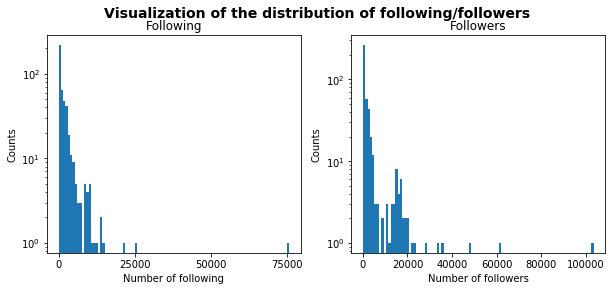

In [90]:
fig=plt.figure(figsize=(10,4))
fig.suptitle('Visualization of the distribution of following/followers', fontsize=14, fontweight='bold')
ax = fig.add_subplot(121)

ax.hist(different_italian_author.following,bins=100,log=True)
ax.set_xlabel('Number of following')
ax.set_ylabel('Counts')
ax.set_title(r'Following')
plt.locator_params(axis='x',nbins=4)

ax2 = fig.add_subplot(122)
ax2.hist(different_italian_author.followers,bins=100,log=True)
ax2.set_xlabel('Number of followers')
ax2.set_ylabel('Counts')
ax2.set_title(r'Followers')

plt.show()

In [68]:
counters=italian_tweets.groupby('author').count()

In [83]:
less_following = different_italian_author.loc[different_italian_author['following'] < 5000]
less_followers = different_italian_author.loc[different_italian_author['followers'] < 5000]

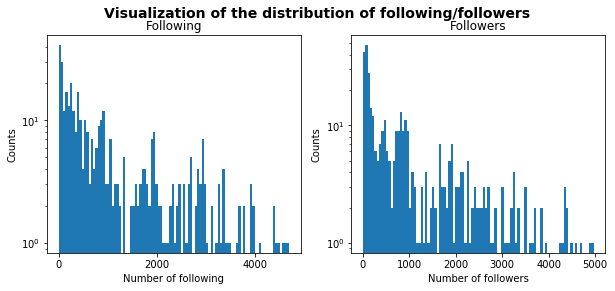

In [91]:
fig=plt.figure(figsize=(10,4))
fig.suptitle('Visualization of the distribution of following/followers', fontsize=14, fontweight='bold')
ax = fig.add_subplot(121)

ax.hist(less_following.following,bins=100, log=True)
ax.set_xlabel('Number of following')
ax.set_ylabel('Counts')
ax.set_title(r'Following')
plt.locator_params(axis='x',nbins=4)

ax2 = fig.add_subplot(122)
ax2.hist(less_followers.followers,bins=100,log=True)
ax2.set_xlabel('Number of followers')
ax2.set_ylabel('Counts')
ax2.set_title(r'Followers')

plt.show()

In [71]:
counters[counters.external_author_id >100]

,external_author_id,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
author,,,,,,,,,,,,,,
1LORENAFAVA1,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2919,2919,2919,2919
ANNAROMAN0,3039,3039,3039,3039,3039,3039,3039,3039,3039,3036,3039,3039,3039,3039
EXQUOTE,1348,1348,1348,1348,1348,1348,1348,1348,1348,7,1348,1348,1348,1348
FINDDIET,577,577,577,577,577,577,577,577,577,299,577,577,577,577
FRANNERVIA,1594,1594,1594,1594,1594,1594,1594,1594,1594,1593,1594,1594,1594,1594
GATTISILGATTI,2510,2510,2510,2510,2510,2510,2510,2510,2510,2509,2510,2510,2510,2510
GIOVANNA__MORET,298,298,298,298,298,298,298,298,298,297,298,298,298,298
HIPPPO_,246,246,246,246,246,246,246,246,246,107,246,246,246,246
MARIALUIGI5,347,347,347,347,347,347,347,347,347,0,347,347,347,347


In [6]:
anna = italian_tweets.loc[italian_tweets['author'] == 'ANNAROMAN0']

In [7]:
anna

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
172961,8.390000e+17,ANNAROMAN0,"Opa Parmalat, Lactalis alza il prezzo a 3 euro...",Italy,Italian,3/10/2017 0:26,3/10/2017 0:27,567,68,192,RETWEET,Italian,0,1,NonEnglish
172962,8.390000e+17,ANNAROMAN0,"Gruppo Espresso-Itedi, via libera condizionato...",Italy,Italian,3/10/2017 0:27,3/10/2017 0:27,567,68,193,RETWEET,Italian,0,1,NonEnglish
172963,8.390000e+17,ANNAROMAN0,"""Mi auguro che sia stato uno stupido errore di...",Italy,Italian,3/10/2017 10:10,3/10/2017 10:10,567,67,218,RETWEET,Italian,0,1,NonEnglish
172964,8.390000e+17,ANNAROMAN0,"TermometroPolitico - #Sondaggi elettorali SWG,...",Italy,Italian,3/10/2017 10:11,3/10/2017 10:11,567,67,219,RETWEET,Italian,0,1,NonEnglish
172965,8.390000e+17,ANNAROMAN0,"Se ieri l'avete perso, il podcast di @alegarig...",Italy,Italian,3/10/2017 10:50,3/10/2017 10:50,567,67,220,RETWEET,Italian,0,1,NonEnglish
172966,8.390000e+17,ANNAROMAN0,WIKIMUSIC del 26/02/2017 - Il primo disco di j...,Italy,Italian,3/10/2017 10:50,3/10/2017 10:50,567,67,221,RETWEET,Italian,0,1,NonEnglish
172967,8.390000e+17,ANNAROMAN0,"ON AIR #Life: labiopalatoschisi, colpisce 2 bi...",Italy,Italian,3/10/2017 11:32,3/10/2017 11:32,567,67,222,RETWEET,Italian,0,1,NonEnglish
172968,8.390000e+17,ANNAROMAN0,"#Lione, scontri in città con i tifosi della #R...",Italy,Italian,3/10/2017 11:32,3/10/2017 11:32,567,67,223,RETWEET,Italian,0,1,NonEnglish
172969,8.390000e+17,ANNAROMAN0,"#Cina, la nuova #ViadellaSeta passa per il Can...",Italy,Italian,3/10/2017 12:14,3/10/2017 12:14,567,67,225,RETWEET,Italian,0,1,NonEnglish
172970,8.390000e+17,ANNAROMAN0,#Libia: gli islamisti conquistano i terminal p...,Italy,Italian,3/10/2017 12:14,3/10/2017 12:14,567,67,224,RETWEET,Italian,0,1,NonEnglish


In [8]:
lorena = italian_tweets.loc[italian_tweets['author'] == '1LORENAFAVA1']

In [9]:
lorena.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
471,8.390000e+17,1LORENAFAVA1,"Masterchef, il vincitore è Valerio Braschi #Ma...",Italy,Italian,3/10/2017 0:00,3/10/2017 0:00,416,58,203,RETWEET,Italian,0,1,NonEnglish
472,8.390000e+17,1LORENAFAVA1,Sternhell ci spiega il nazionalismo razzista e...,Italy,Italian,3/10/2017 0:31,3/10/2017 0:31,416,58,204,RETWEET,Italian,0,1,NonEnglish
473,8.390000e+17,1LORENAFAVA1,https://t.co/CHnirfPdLO I #Sioux sono arrivat...,Italy,Italian,3/10/2017 0:47,3/10/2017 0:47,416,58,205,RETWEET,Italian,0,1,NonEnglish
474,8.390000e+17,1LORENAFAVA1,La stagione 7 di #GamesOfThrones in tv dal 16 ...,Italy,Italian,3/10/2017 10:07,3/10/2017 10:07,416,58,219,RETWEET,Italian,0,1,NonEnglish
475,8.390000e+17,1LORENAFAVA1,Su Left in edicola domani il racconto (e le in...,Italy,Italian,3/10/2017 10:23,3/10/2017 10:23,416,58,220,RETWEET,Italian,0,1,NonEnglish


In [10]:
gatti = italian_tweets.loc[italian_tweets['author'] == 'GATTISILGATTI']

In [11]:
guidi = italian_tweets.loc[italian_tweets['author'] == 'VITTOREGUIDI']

In [12]:
frann = italian_tweets.loc[italian_tweets['author'] == 'FRANNERVIA']

In [13]:
exq = italian_tweets.loc[italian_tweets['author'] == 'EXQUOTE']

In [14]:
lorena = lorena.sort_values('publish_date', ascending=True)
gatti = gatti.sort_values('publish_date', ascending=True)
guidi = guidi.sort_values('publish_date', ascending=True)
frann = frann.sort_values('publish_date', ascending=True)
exq = exq.sort_values('publish_date', ascending=True)
anna = anna.sort_values('publish_date', ascending=True)

In [16]:
anna

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
172961,8.390000e+17,ANNAROMAN0,"Opa Parmalat, Lactalis alza il prezzo a 3 euro...",Italy,Italian,3/10/2017 0:26,3/10/2017 0:27,567,68,192,RETWEET,Italian,0,1,NonEnglish
172962,8.390000e+17,ANNAROMAN0,"Gruppo Espresso-Itedi, via libera condizionato...",Italy,Italian,3/10/2017 0:27,3/10/2017 0:27,567,68,193,RETWEET,Italian,0,1,NonEnglish
172963,8.390000e+17,ANNAROMAN0,"""Mi auguro che sia stato uno stupido errore di...",Italy,Italian,3/10/2017 10:10,3/10/2017 10:10,567,67,218,RETWEET,Italian,0,1,NonEnglish
172964,8.390000e+17,ANNAROMAN0,"TermometroPolitico - #Sondaggi elettorali SWG,...",Italy,Italian,3/10/2017 10:11,3/10/2017 10:11,567,67,219,RETWEET,Italian,0,1,NonEnglish
172965,8.390000e+17,ANNAROMAN0,"Se ieri l'avete perso, il podcast di @alegarig...",Italy,Italian,3/10/2017 10:50,3/10/2017 10:50,567,67,220,RETWEET,Italian,0,1,NonEnglish
172966,8.390000e+17,ANNAROMAN0,WIKIMUSIC del 26/02/2017 - Il primo disco di j...,Italy,Italian,3/10/2017 10:50,3/10/2017 10:50,567,67,221,RETWEET,Italian,0,1,NonEnglish
172967,8.390000e+17,ANNAROMAN0,"ON AIR #Life: labiopalatoschisi, colpisce 2 bi...",Italy,Italian,3/10/2017 11:32,3/10/2017 11:32,567,67,222,RETWEET,Italian,0,1,NonEnglish
172968,8.390000e+17,ANNAROMAN0,"#Lione, scontri in città con i tifosi della #R...",Italy,Italian,3/10/2017 11:32,3/10/2017 11:32,567,67,223,RETWEET,Italian,0,1,NonEnglish
172969,8.390000e+17,ANNAROMAN0,"#Cina, la nuova #ViadellaSeta passa per il Can...",Italy,Italian,3/10/2017 12:14,3/10/2017 12:14,567,67,225,RETWEET,Italian,0,1,NonEnglish
172970,8.390000e+17,ANNAROMAN0,#Libia: gli islamisti conquistano i terminal p...,Italy,Italian,3/10/2017 12:14,3/10/2017 12:14,567,67,224,RETWEET,Italian,0,1,NonEnglish


In [ ]:
fig = plt.figure(figsize=(10, 6))

# iterate the different groups to create a different series
#for country, missions in missions_by_date.groupby("ContryFlyingMission"): 
plt.plot(lorena["publish_date"], lorena["followers"])
#plt.plot(anna["publish_date"], anna["followers"])
plt.show()
#plt.legend(loc='best')